In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import torch.nn as nn

In [2]:
X, y = make_circles(n_samples=1000, shuffle=True, noise=.04, random_state=42, factor=0.8)

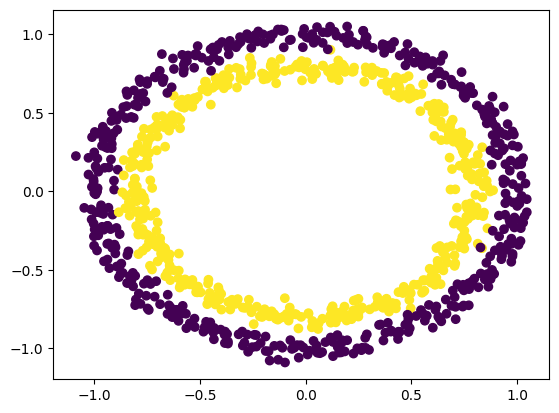

In [3]:
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c = y)

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
X = torch.from_numpy(X)
y = torch.from_numpy(y)
X = X.to(torch.float32)
y = y.to(torch.float32)

In [6]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
class OnehiddenLayer(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin_1 = nn.Linear(in_features=2, out_features=20, bias = True)
        self.lin_2 = nn.Linear(in_features=20, out_features=1, bias = True)
        self.relu  = nn.ReLU() 
        self.sigm  = nn.Sigmoid()

    def forward(self, X):
        return  self.sigm(self.lin_2(self.relu(self.lin_1(X))))

In [8]:
torch.manual_seed(1234)
ohl = OnehiddenLayer()

In [9]:
lr      = 0.1
opt     = torch.optim.SGD(ohl.parameters(), lr=lr)
loss_fn = torch.nn.BCELoss()

In [10]:
n_epochs = 4500

num_epoch = []
acc_ep    = []
loss_ep   = []
loss_tr   = []


X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


for num_ep in range(n_epochs):
    
    ohl.train()
    y_pred = torch.squeeze(ohl(X_train))
    loss   = loss_fn(y_pred, y_train)
    
    opt.zero_grad()
    loss.backward()
    opt.step()

    ohl.eval()
    with torch.inference_mode():
      if (num_ep % 10 == 0):
          num_epoch.append(num_ep)

          y_pred_test = torch.squeeze(ohl(X_test))
          loss_test   = loss_fn(y_pred_test, y_test)
          loss_ep.append(loss_test.detach().item())
          loss_tr.append(loss.detach().item())

          acc_ep.append(accuracy_score(y_test.numpy(), np.round(y_pred_test.numpy()))) 


Text(0.5, 0, '# epoch')

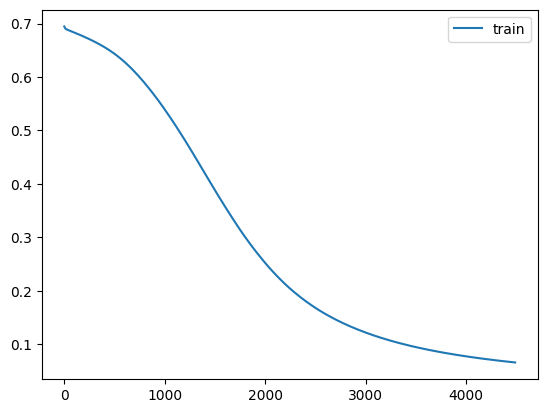

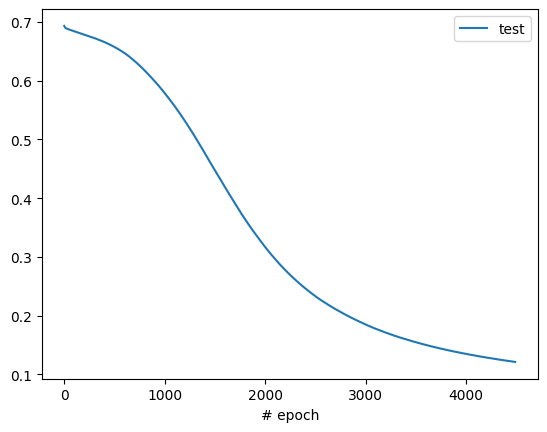

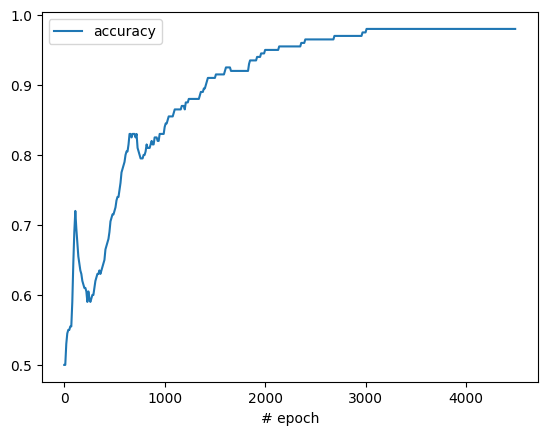

In [11]:
fig, ax = plt.subplots()
ax.plot(num_epoch, loss_tr, label = 'train')
ax.legend()

fig, ax = plt.subplots()
ax.plot(num_epoch, loss_ep, label= 'test')
ax.legend()
ax.set_xlabel('# epoch')


fig, ax = plt.subplots()
ax.plot(num_epoch, acc_ep, label= 'accuracy')
ax.legend()
ax.set_xlabel('# epoch')

In [12]:
#  boundaries
XX, YY  = np.meshgrid(np.arange(-1, 1, .01), np.arange(-1, 1, 0.01))

In [13]:
col_pred = []
with torch.inference_mode():
  for x_t, y_t in zip(XX.ravel(), YY.ravel()):
      X_temp = torch.tensor([x_t,y_t], dtype = torch.float32)
      col_pred.append(str(np.round(ohl(X_temp).detach().item())))

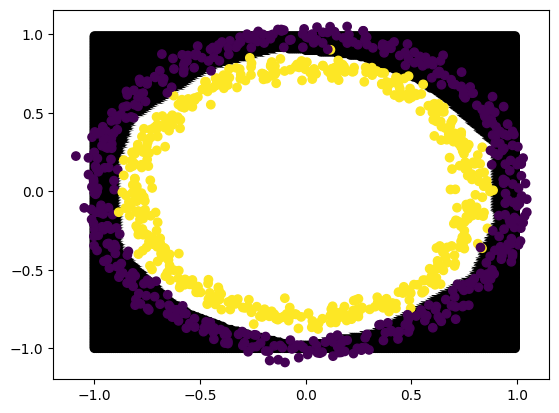

In [14]:
fig, ax = plt.subplots()
ax.scatter(XX.ravel(), YY.ravel(), c = col_pred)
ax.scatter(X[:,0], X[:,1], c = y)

